[![preview notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PyMPDATA/blob/main/examples/PyMPDATA_examples/Arabas_and_Farhat_2020/fig_3.ipynb)
[![launch on mybinder.org](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PyMPDATA.git/main?urlpath=lab/tree/examples/PyMPDATA_examples/Arabas_and_Farhat_2020/fig_3.ipynb)
[![launch on Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PyMPDATA/blob/main/examples/PyMPDATA_examples/Arabas_and_Farhat_2020/fig_3.ipynb)

based on Fig. 3 from [Arabas & Farhat 2020](https://doi.org/10.1016/j.cam.2019.05.023)

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PyMPDATA-examples')

In [2]:
import os
import numpy as np
from matplotlib import pyplot
from open_atmos_jupyter_utils import show_plot
from PyMPDATA_examples.Arabas_and_Farhat_2020.analysis_figures_2_and_3 import convergence_in_time
from PyMPDATA_examples.Arabas_and_Farhat_2020.colors import colors

In [3]:
data_l2_err = convergence_in_time(num=3 if 'CI' in os.environ else None)

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done   3 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-2)]: Done  10 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-2)]: Done  22 out of  39 | elapsed:  1.2min remaining:   55.9s
[Parallel(n_jobs=-2)]: Done  26 out of  39 | elapsed:  1.2min remaining:   36.2s
[Parallel(n_jobs=-2)]: Done  30 out of  39 | elapsed:  1.2min remaining:   21.8s
[Parallel(n_jobs=-2)]: Done  34 out of  39 | elapsed:  1.2min remaining:   10.7s
[Parallel(n_jobs=-2)]: Done  39 out of  39 | elapsed:  1.2min finished


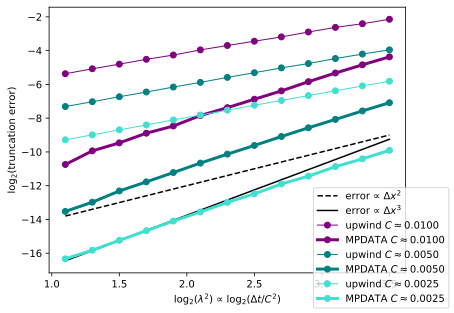

In [4]:
fig, ax = pyplot.subplots()
x = np.array(next(iter(data_l2_err.values()))[0])
ax.plot(x, 2*x-16, '--', label="error ∝ $Δx^2$", color='black')
ax.plot(x, 3*x-19.75, label="error ∝ $Δx^3$", color='black')
i=0
for key, value in data_l2_err.items():
    ax.plot(
        *value, 
        marker='o', 
        label=key, 
        linewidth=1 if key.startswith("upwind") else 3,
        color=colors[i//2]
    )
    i += 1
ax.set_xlabel("log$_2(λ^2)$ ∝ log$_2(Δt/C^2)$")
ax.set_ylabel("log$_2$(truncation error)")
fig.legend(loc='lower right')
show_plot()

In [5]:
upwind_convergence_rate_below_1st_order = 1.3
for key, value in data_l2_err.items():
    if key.startswith("upwind"):
        x, y = value[0], value[1]
        slope = np.diff(y) / np.diff(x)
        np.testing.assert_almost_equal(np.mean(slope), upwind_convergence_rate_below_1st_order, 1)

In [6]:
mpdata_convergence_rate_above_1st_order = 2.7
for key, value in data_l2_err.items():
    if key.startswith("MPDATA"):
        x, y = value[0], value[1]
        slope = np.diff(y) / np.diff(x)
        np.testing.assert_almost_equal(np.mean(slope), mpdata_convergence_rate_above_1st_order, 1)